# Auswertung von R2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Hier werden die R2-Werte der vervollständigten Datensätze visualisiert und die Ergebnistabellen für alle Durchläufe der Experimente erstellt.

In [2]:
set_names = ['r1','r1_detail','r2','r2_detail', 'r3','r3_detail']
sets = []
for name in set_names:
    sets.append(pd.read_csv(f'additional_data/results/{name}.csv'))
sets = {set_names[i]: sets[i] for i in range(len(sets))}
order = ['Overall Mean', 'Yearly Mean', 'Yearly Mean/Region', 'Backfill',
       'Interpolate all', 'MICE 1', 'MICE 2', 'KNN 1', 'KNN 2']

In [3]:
sets['r1_detail'].columns = ['method', 'run','r2','rmse','still_missing','t']
sets['r2_detail'].columns = ['method', 'run','r2','rmse','still_missing','t']
sets['r3_detail'].columns = ['method', 'run','r2','rmse','still_missing','t']

sets['r1_detail'].run = sets['r1_detail'].run + 1
sets['r2_detail'].run = sets['r2_detail'].run + 1
sets['r3_detail'].run = sets['r3_detail'].run + 1

sets['r1_detail'].replace('Yearly Mean per Region', 'Yearly Mean/Region', inplace=True)
sets['r2_detail'].replace('Yearly Mean per Region', 'Yearly Mean/Region', inplace=True)
sets['r3_detail'].replace('Yearly Mean per Region', 'Yearly Mean/Region', inplace=True)

sets['r1_detail'].set_index(['method', 'run'], inplace=True)
sets['r2_detail'].set_index(['method', 'run'], inplace=True)
sets['r3_detail'].set_index(['method', 'run'], inplace=True)

sets['r1_detail'] = sets['r1_detail'].loc[order]
sets['r2_detail'] = sets['r2_detail'].loc[order]
sets['r3_detail'] = sets['r3_detail'].loc[order]

sets['r1_detail'].still_missing = sets['r1_detail'].still_missing.astype(int)
sets['r2_detail'].still_missing = sets['r2_detail'].still_missing.astype(int)
sets['r3_detail'].still_missing = sets['r3_detail'].still_missing.astype(int)

### average sets



sets['r1'].columns = ['method', 'r2','RMSE','still_missing','t']
sets['r2'].columns = ['method', 'r2','RMSE','still_missing','t']
sets['r3'].columns = ['method', 'r2','RMSE','still_missing','t']

sets['r1'].replace('Yearly Mean per Region', 'Yearly Mean/Region', inplace=True)
sets['r2'].replace('Yearly Mean per Region', 'Yearly Mean/Region', inplace=True)
sets['r3'].replace('Yearly Mean per Region', 'Yearly Mean/Region', inplace=True)

sets['r1'].set_index('method', inplace=True)
sets['r2'].set_index('method', inplace=True)
sets['r3'].set_index('method', inplace=True)



sets['r1'] = sets['r1'].loc[order]
sets['r2'] = sets['r2'].loc[order]
sets['r3'] = sets['r3'].loc[order]

In [4]:
sets['r1']

,r2,RMSE,still_missing,t
method,,,,
Overall Mean,-0.00,0.99,0.00,0.86
Yearly Mean,0.02,0.98,52298.00,0.70
Yearly Mean/Region,0.19,0.89,58248.43,0.81
Backfill,0.86,0.35,135535.57,0.61
Interpolate all,0.86,0.35,112679.29,1.89
MICE 1,0.86,0.35,0.00,134.02
MICE 2,0.76,0.48,0.00,430.96
KNN 1,0.79,0.45,0.00,115.11
KNN 2,0.86,0.36,0.00,15.13


## R2 visualisieren

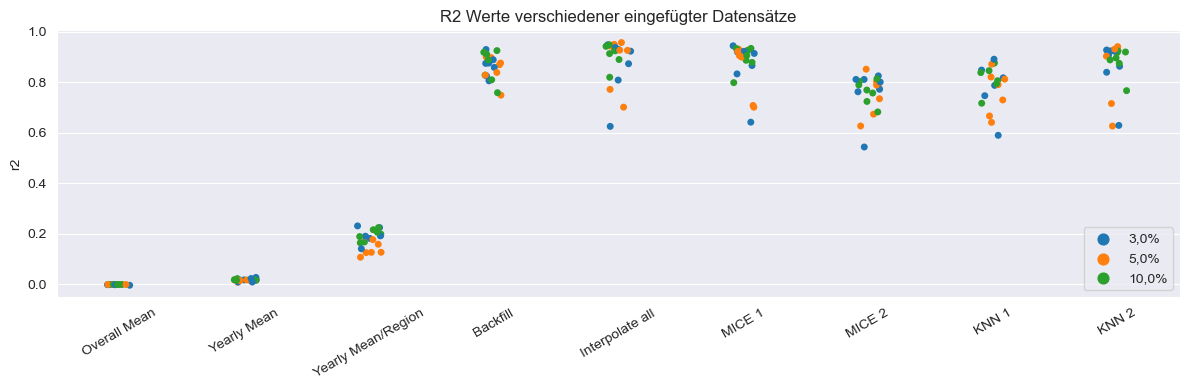

In [5]:
rs = pd.DataFrame({'3,0%': sets['r1_detail'].r2, '5,0%':sets['r2_detail'].r2, '10,0%': sets['r3_detail'].r2},
                 index = sets['r1_detail'].r2.index)
rs = rs.reset_index()


rs['method'] = pd.Categorical(rs['method'],categories=order, ordered=True)


d1 = pd.DataFrame(rs.drop('run', axis=1).set_index('method').stack())
d1 = d1.reset_index()
d1.columns = ['Methode', 'entfernte Werte', 'r2']


sns.set_style("darkgrid")
#sns.set_palette("Set1")
sns.set_palette("tab10")

fig, (ax1) = plt.subplots(figsize =(12, 4), nrows=1)
sns.stripplot(data=d1, x='Methode', y='r2', hue='entfernte Werte',palette=["C0", "C1", "C2", ], ax=ax1)


ax1.set_title('R2 Werte verschiedener eingefügter Datensätze')
ax1.tick_params(axis='x', rotation=30)
ax1.set_xlabel('')
ax1.legend(loc='lower right')


plt.tight_layout()

plt.savefig('figures/results/r2')

## Tabellen erstellen

In [6]:
print(sets['r1'].to_latex(caption= 'Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 3\% fehlenden Werten.'))

\begin{table}
\centering
\caption{Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 3\% fehlenden Werten.}
\begin{tabular}{lrrrr}
\toprule
{} &    r2 &  RMSE &  still\_missing &      t \\
method             &       &       &                &        \\
\midrule
Overall Mean       & -0.00 &  0.99 &           0.00 &   0.86 \\
Yearly Mean        &  0.02 &  0.98 &       52298.00 &   0.70 \\
Yearly Mean/Region &  0.19 &  0.89 &       58248.43 &   0.81 \\
Backfill           &  0.86 &  0.35 &      135535.57 &   0.61 \\
Interpolate all    &  0.86 &  0.35 &      112679.29 &   1.89 \\
MICE 1             &  0.86 &  0.35 &           0.00 & 134.02 \\
MICE 2             &  0.76 &  0.48 &           0.00 & 430.96 \\
KNN 1              &  0.79 &  0.45 &           0.00 & 115.11 \\
KNN 2              &  0.86 &  0.36 &           0.00 &  15.13 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\mbfbr\AppData\Local\Temp\ipykernel_20676\4129489065.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sets['r1'].to_latex(caption= 'Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 3\% fehlenden Werten.'))


In [7]:
print(sets['r2'].to_latex(label='fig:results',
    caption= 'Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 5\% fehlenden Werten.'))

\begin{table}
\centering
\caption{Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 5\% fehlenden Werten.}
\label{fig:results}
\begin{tabular}{lrrrr}
\toprule
{} &    r2 &  RMSE &  still\_missing &      t \\
method             &       &       &                &        \\
\midrule
Overall Mean       & -0.00 &  1.05 &           0.00 &   1.11 \\
Yearly Mean        &  0.02 &  1.04 &       52298.00 &   0.94 \\
Yearly Mean/Region &  0.14 &  0.97 &       58352.71 &   1.05 \\
Backfill           &  0.85 &  0.39 &      135735.29 &   0.86 \\
Interpolate all    &  0.88 &  0.34 &      112822.00 &   2.16 \\
MICE 1             &  0.86 &  0.39 &           0.00 & 136.03 \\
MICE 2             &  0.75 &  0.52 &           0.00 & 427.03 \\
KNN 1              &  0.76 &  0.51 &           0.00 & 117.43 \\
KNN 2              &  0.85 &  0.38 &           0.00 &  15.58 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\mbfbr\AppData\Local\Temp\ipykernel_20676\2855632609.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sets['r2'].to_latex(label='fig:results',


In [8]:
print(sets['r3'].to_latex(caption= 'Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 10\% fehlenden Werten.'))

\begin{table}
\centering
\caption{Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 10\% fehlenden Werten.}
\begin{tabular}{lrrrr}
\toprule
{} &    r2 &  RMSE &  still\_missing &      t \\
method             &       &       &                &        \\
\midrule
Overall Mean       & -0.00 &  0.99 &           0.00 &   1.77 \\
Yearly Mean        &  0.02 &  0.98 &       52320.57 &   1.60 \\
Yearly Mean/Region &  0.20 &  0.89 &       58597.43 &   1.71 \\
Backfill           &  0.86 &  0.36 &      136315.29 &   1.51 \\
Interpolate all    &  0.91 &  0.29 &      113218.57 &   2.90 \\
MICE 1             &  0.89 &  0.32 &           0.00 & 133.39 \\
MICE 2             &  0.76 &  0.48 &           0.00 & 429.03 \\
KNN 1              &  0.82 &  0.42 &           0.00 & 123.99 \\
KNN 2              &  0.88 &  0.33 &           0.00 &  16.72 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\mbfbr\AppData\Local\Temp\ipykernel_20676\1507838682.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sets['r3'].to_latex(caption= 'Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 10\% fehlenden Werten.'))


In [9]:
print(sets['r1_detail'].to_latex(longtable=True, label= 'tab:r2_det_3',
                                 caption= 'Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 3\% fehlenden Werten.'))

\begin{longtable}{llrrrr}
\caption{Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 3\% fehlenden Werten.}
\label{tab:r2_det_3}\\
\toprule
      &   &    r2 &  rmse &  still\_missing &      t \\
method & run &       &       &                &        \\
\midrule
\endfirsthead
\caption[]{Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 3\% fehlenden Werten.} \\
\toprule
      &   &    r2 &  rmse &  still\_missing &      t \\
method & run &       &       &                &        \\
\midrule
\endhead
\midrule
\multicolumn{6}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
Overall Mean & 1 & -0.00 &  0.93 &              0 &   0.86 \\
      & 2 & -0.00 &  1.03 &              0 &   0.86 \\
      & 3 & -0.00 &  0.95 &              0 &   0.87 \\
      & 4 & -0.00 &  1.02 &              0 &   0.87 \\
      & 5 & -0.00 &  1.02 &              0 &   0.87 \\
      & 6 & -0.00 &  1.11 &              0 &   0.86 \\
      & 7 & -0.00 &  0.89 &          

C:\Users\mbfbr\AppData\Local\Temp\ipykernel_20676\3918931012.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sets['r1_detail'].to_latex(longtable=True, label= 'tab:r2_det_3',


In [10]:
print(sets['r2_detail'].to_latex(longtable=True,label='tab:r2_det_5',
                                 caption= 'Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 5\% fehlenden Werten.'))

C:\Users\mbfbr\AppData\Local\Temp\ipykernel_20676\1317414301.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sets['r2_detail'].to_latex(longtable=True,label='tab:r2_det_5',


\begin{longtable}{llrrrr}
\caption{Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 5\% fehlenden Werten.}
\label{tab:r2_det_5}\\
\toprule
      &   &    r2 &  rmse &  still\_missing &      t \\
method & run &       &       &                &        \\
\midrule
\endfirsthead
\caption[]{Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 5\% fehlenden Werten.} \\
\toprule
      &   &    r2 &  rmse &  still\_missing &      t \\
method & run &       &       &                &        \\
\midrule
\endhead
\midrule
\multicolumn{6}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
Overall Mean & 1 & -0.00 &  1.07 &              0 &   1.12 \\
      & 2 & -0.00 &  0.97 &              0 &   1.11 \\
      & 3 & -0.00 &  1.17 &              0 &   1.11 \\
      & 4 & -0.00 &  1.11 &              0 &   1.11 \\
      & 5 & -0.00 &  0.96 &              0 &   1.11 \\
      & 6 & -0.00 &  0.97 &              0 &   1.11 \\
      & 7 & -0.00 &  1.06 &          

In [11]:
print(sets['r3_detail'].to_latex(longtable=True, label='tab:r2_det_10',
                                 caption= 'Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 10\% fehlenden Werten.'))

\begin{longtable}{llrrrr}
\caption{Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 10\% fehlenden Werten.}
\label{tab:r2_det_10}\\
\toprule
      &   &    r2 &  rmse &  still\_missing &      t \\
method & run &       &       &                &        \\
\midrule
\endfirsthead
\caption[]{Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 10\% fehlenden Werten.} \\
\toprule
      &   &    r2 &  rmse &  still\_missing &      t \\
method & run &       &       &                &        \\
\midrule
\endhead
\midrule
\multicolumn{6}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
Overall Mean & 1 & -0.00 &  1.00 &              0 &   1.77 \\
      & 2 & -0.00 &  0.97 &              0 &   1.76 \\
      & 3 & -0.00 &  0.94 &              0 &   1.76 \\
      & 4 & -0.00 &  1.04 &              0 &   1.77 \\
      & 5 & -0.00 &  0.98 &              0 &   1.77 \\
      & 6 & -0.00 &  1.00 &              0 &   1.76 \\
      & 7 & -0.00 &  1.00 &       

C:\Users\mbfbr\AppData\Local\Temp\ipykernel_20676\585024785.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sets['r3_detail'].to_latex(longtable=True, label='tab:r2_det_10',
